# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from math import e
import pandas as pd
import seaborn as sns

import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

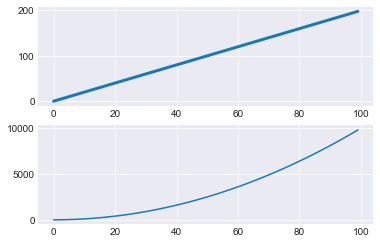

In [3]:
# Method 1
# I'm interpreting "doing this" as ploting subplots

# defining the style
plt.style.use('seaborn-darkgrid')

# defining the figure
fig = plt.figure()

# defining some axis (height, width, plot#)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# ploting the subplots
ax1.plot(x, y, linewidth = 3)
ax2.plot(x, z)

# to check the available styles
plt.style.available

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

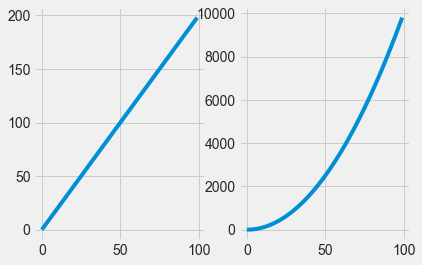

In [4]:
# Method 2

# I'm unsure if this' what's being asked..

# defining the style
plt.style.use('fivethirtyeight')

# defining new axis ((height, width), (starting points))
ax3 = plt.subplot2grid((1, 2), (0, 0), rowspan = 1, colspan = 1)
ax4 = plt.subplot2grid((1, 2), (0, 1), rowspan = 1, colspan = 2)

# ploting the subplots
ax3.plot(x, y)
ax4.plot(x, z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

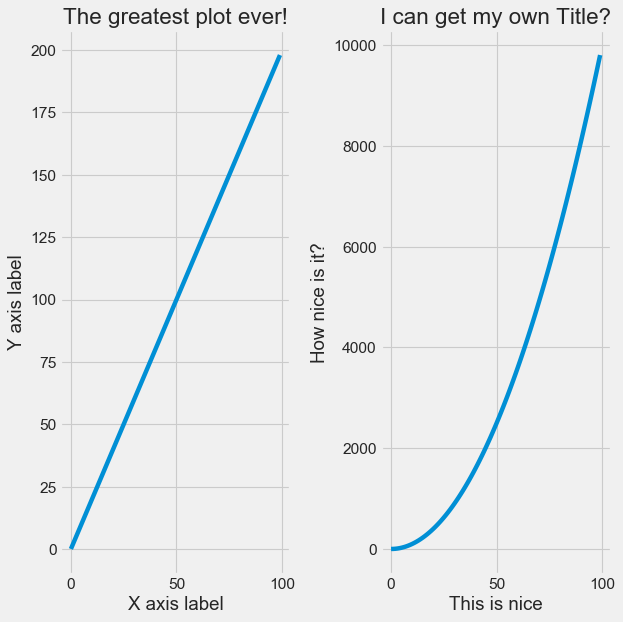

In [5]:
# your code here

# redefining the figure
fig = plt.figure(num = None, figsize = (8, 8), dpi = 80)

# defining new axis ((height, width), (starting points))
ax5 = plt.subplot2grid((1, 2), (0, 0), rowspan = 1, colspan = 1)
ax6 = plt.subplot2grid((1, 2), (0, 1), rowspan = 1, colspan = 2)

# ploting the subplots
ax5.plot(x, y)
ax6.plot(x, z)

# add titles to subplots
ax5.set_title("The greatest plot ever!")
ax6.set_title("I can get my own Title?")

# add labels to subplot 1
ax5.set_xlabel("X axis label")
ax5.set_ylabel("Y axis label")

# add labels to subplot 2
ax6.set_xlabel("This is nice")
ax6.set_ylabel("How nice is it?")

# To get everything just right
plt.tight_layout()
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


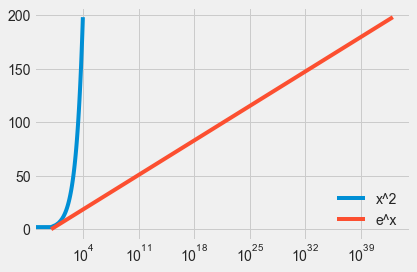

In [6]:
# your code here

# unsure if this is what's being asked...

# creating the figure
fig = plt.figure()

# setting the axis
ax7 = fig.add_subplot(111)
ax8 = fig.add_subplot(111)

# ploting them
ax7.plot((x ** 2), y, label = "x^2")
ax8.plot((e ** x), y, label = "e^x")

# setting the scales
plt.yscale('linear')
plt.xscale('log')
plt.legend()
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

In [7]:
# your code here
# see above

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
# I did not understand "You can find the dataset in Ironhack's database"
fitbit = pd.read_csv("Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


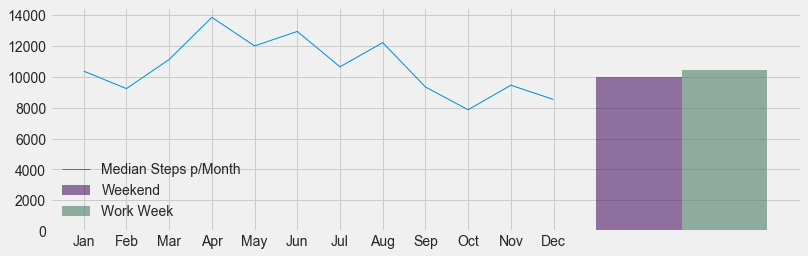

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
"""
'Set the current Axes instance to ax.

The current Figure is updated to the parent of ax.' ???
From: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.sca.html

^ I'm not understanding this. ^

Choosing the graphs by consulting:
https://www.sisense.com/blog/10-useful-ways-visualize-data-examples/ and
http://python-graph-gallery.com
"""

# if it was "Months", I'd use a line plot. In this case, box
median_steps_month = fitbit.groupby(by = ["Months_encoded"])["Steps"].median()

fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(median_steps_month, lw = 1, label = "Median Steps p/Month")
plt.xticks(median_steps_month.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
                                      'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
week_work_end = fitbit.groupby(by = ["Work_or_Weekend"])['Steps'].median()

# Create bars
barWidth = 2
weekend, workweek = week_work_end
bars = weekend + workweek
 
# The X position of bars
r1 = 14
r2 = 16
r3 = r1 + r2
 
# Create barplot
plt.bar(r1, weekend, width = barWidth, color = (0.3,0.1,0.4,0.6), label = "Weekend")
plt.bar(r2, workweek, width = barWidth, color = (0.3,0.5,0.4,0.6), label = "Work Week")
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
# plt.xticks([r1, r2], ["Weekend", "Workweek"], rotation = 90)

# Adjust the margins
plt.subplots_adjust(bottom = 0.2, top = 0.98)
 
#plt.sca(fitbit["Work_or_Weekend"][10])

# Saving the graph
plt.savefig("./figures/fitbit.png", dpi = 100, facecolor = 'w', edgecolor = 'w',
        orientation = 'portrait', papertype = None, format = "png",
        transparent = False, bbox_inches = None, pad_inches = 0.1,
        frameon = None, metadata = None)

# Show graphic
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

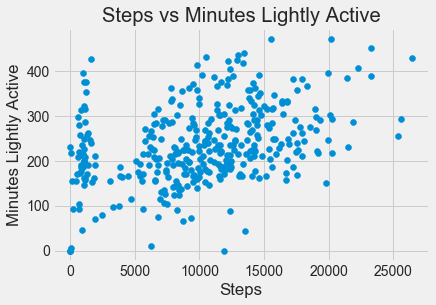

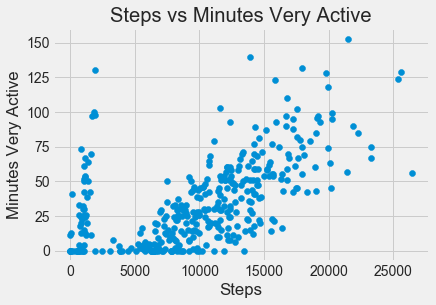

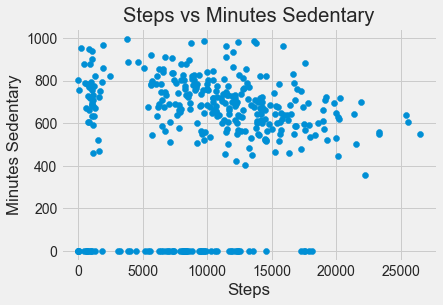

In [10]:
# your code here
columns = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]

for col in columns:
    plt.figure()
    plt.title("Steps vs " + col)
    plt.xlabel("Steps")
    plt.ylabel(col)
    plt.scatter(fitbit["Steps"], fitbit[col])

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [124]:
# your code here
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [47]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [48]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include = np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [49]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include = "category")

# if what was meant was all the strings (since there's no categorical dtype in this ds),
# it would be titanic.select_dtypes(include = "object")

""
0
1
2
3
4
...
1304
1305
1306
1307


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

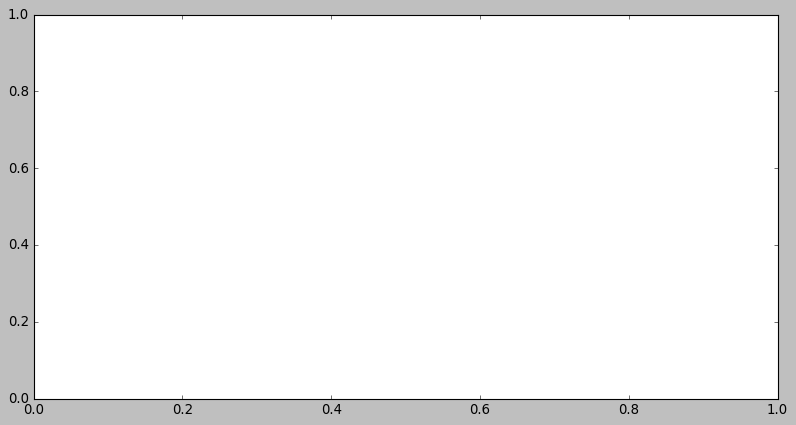

In [50]:
# your code here

plt.style.available
plt.style.use('classic')
fig = plt.subplots(figsize = (12, 6))

#### Use the right visulalization to show the distribution of column `Age`.

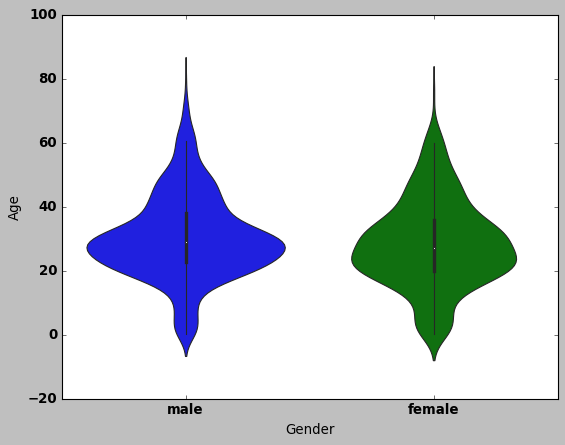

In [74]:
# your code here
# just by Age: sns.violinplot(y = titanic["Age"])
sns.violinplot(x = titanic["Gender"], y = titanic["Age"]) # Age and gender

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

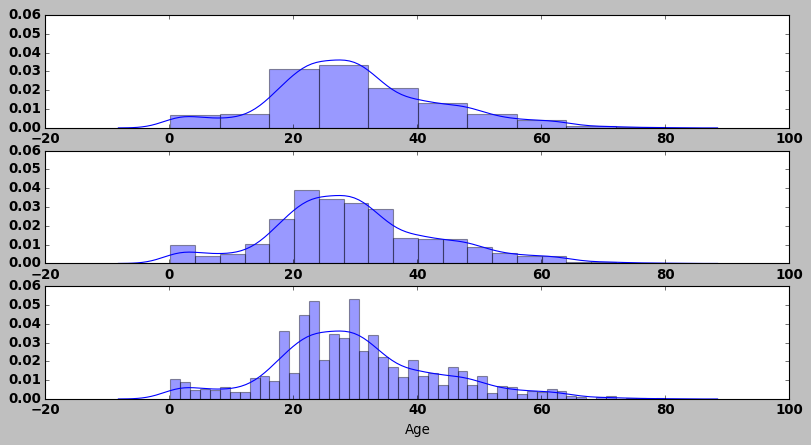

In [94]:
# your code here
# Make default histogram
f, axes = plt.subplots(3, 1, figsize=(12, 6), sharex = False, sharey = True)

# Control the number of bins
ax1 = sns.distplot(titanic["Age"], bins = 10, ax = axes[0])
ax2 = sns.distplot(titanic["Age"], bins = 20, ax = axes[1])
ax3 = sns.distplot(titanic["Age"], bins = 50, ax = axes[2])

#### How does the bin size affect your plot?

In [18]:
"""
If I'm understanding the question correctly, not much in this case. The Ages distribution 
seems to become less smooth, with more peaks and valleys, but the overall trend remains
the same: many people between the ages of aprox 20 and 40, not many in the extremes.
"""

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

In [19]:
# your code here
# Is this question repeated? Did I do something wrong before? Was it meant to be Gender?

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

([<matplotlib.patches.Wedge at 0x1a1bd27150>,
 [Text(-0.9893411941747885, -0.4808367722094511, 'Male'),
  Text(1.0792813518479694, 0.5245491049970632, 'Female')],
 [Text(-0.5396406513680664, -0.26227460302333694, '64.40%'),
  Text(0.629580788577982, 0.30598697791495355, '35.60%')])

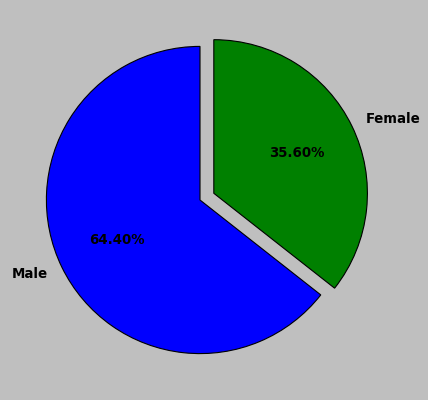

In [131]:
# Method 1 - matplotlib
# your code here
plt.pie(titanic.Gender.value_counts(), explode = [0, 0.1], labels = ['Male', 'Female'], 
        autopct='%1.2f%%', startangle = 90)


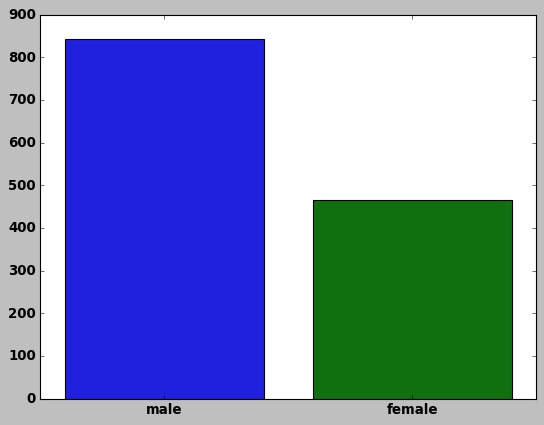

In [132]:
# Method 2 - seaborn
# your code here
sns.barplot(titanic.Gender.value_counts().index, titanic.Gender.value_counts().values)

#### Use the right plot to visualize the column `Pclass`.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

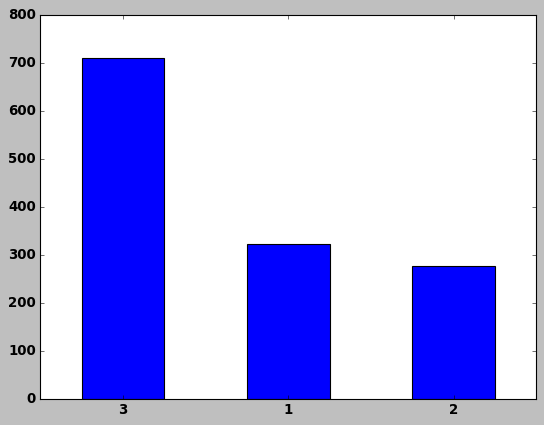

In [147]:
# your code here
titanic["Pclass"].value_counts().plot.bar()
plt.xticks(rotation = 0) # I don't understand why if the rotation isn't explicitly set, 
# is not getting a default rotation at '0'.

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1b005ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1a8a2090>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1b02d090>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1a8a2a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1bac3190>],
 'means': []}

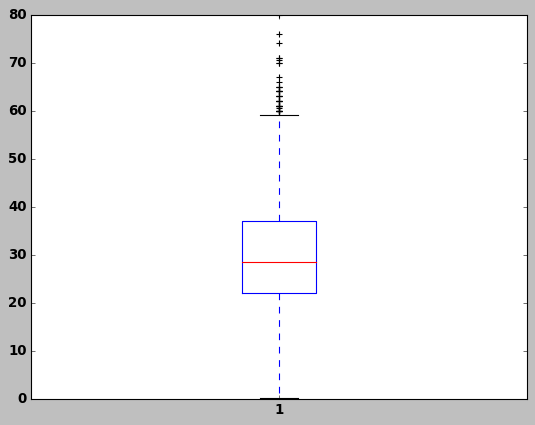

In [148]:
# your code here
plt.boxplot(titanic.Age)

In [153]:
"""
Using a boxplot is similar to using the method .describe(), where both are summary 
statistics of the studied object (The boxplot visually, the .describe method with the 
information shown in a table). They can be used in a complementary fashion, allowing for 
a better understanding of the data. 
"""
titanic.Age.describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

#### What does the last plot tell you about the feature `Age`?

In [152]:
"""
If you're over 60 on the Titanic, you'd be an outlier, most people where betwen (aprox.) 20
and 40 years old, the youngest person aboard was a newborn, and the oldest was 80 years 
young.
"""

"\nIf you're over 60 on the Titanic, you'd be an outlier, most people where betwen (aprox.) 20\nand 40 years old, the youngest person aboard was a newborn, and the oldest was 80 years \nyoung.\n"

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

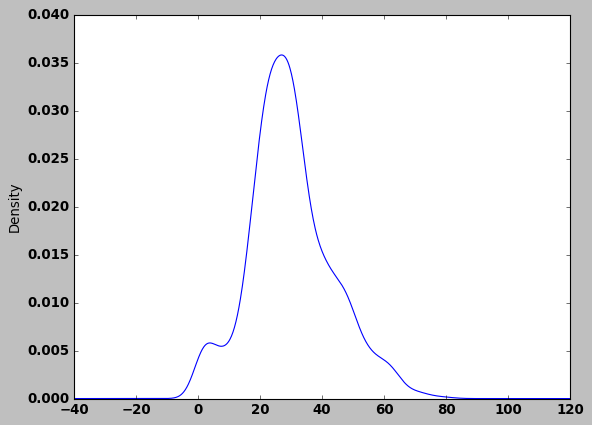

In [157]:
# your code here
# if I'm understanding the question correctly we could have something like:
titanic.Age.plot(kind = "kde")

#### What additional information does the last plot provide about feature `Age`?

In [158]:
"""
It adds some information on how the ages are concentrated over the interval (just over 20
years old), and shows more clearly how the age was distributed.
"""

'\nIt adds some information on how the ages are concentrated over the interval (just over 20\nyears old), and shows more clearly how the age was distributed.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [28]:
# Method 1 - matplotlib
# your code here

In [29]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [30]:
# your code here

#### What are the most correlated features?

In [31]:
"""
your comments here
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [32]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [33]:
# your code here